In [1]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [6]:
data <- read_csv('../Datasets/DLL/ECDC/DLL_COVID_TRAIN.csv')
head(data)

Parsed with column specification:
cols(
  countryterritoryCode = col_character(),
  dateRep = col_date(format = ""),
  cases = col_double(),
  deaths = col_double(),
  countriesAndTerritories = col_character(),
  popData2018 = col_double(),
  `GDP (current US$)` = col_double(),
  `GDP per capita (current US$)` = col_double(),
  `Access to electricity (% of population)` = col_double(),
  `Current health expenditure per capita (current US$)` = col_double(),
  `Current health expenditure (% of GDP)` = col_double(),
  `Hospital beds (per 1,000 people)` = col_double()
)


countryterritoryCode,dateRep,cases,deaths,countriesAndTerritories,popData2018,GDP (current US$),GDP per capita (current US$),Access to electricity (% of population),Current health expenditure per capita (current US$),Current health expenditure (% of GDP),"Hospital beds (per 1,000 people)"
AFG,2020-04-18,51,1,Afghanistan,37172386,19362969582,520.8966,97.7,67.12265,11.77719,0.5
AFG,2020-04-17,10,4,Afghanistan,37172386,19362969582,520.8966,97.7,67.12265,11.77719,0.5
AFG,2020-04-16,70,2,Afghanistan,37172386,19362969582,520.8966,97.7,67.12265,11.77719,0.5
AFG,2020-04-15,49,2,Afghanistan,37172386,19362969582,520.8966,97.7,67.12265,11.77719,0.5
AFG,2020-04-14,58,3,Afghanistan,37172386,19362969582,520.8966,97.7,67.12265,11.77719,0.5
AFG,2020-04-13,52,0,Afghanistan,37172386,19362969582,520.8966,97.7,67.12265,11.77719,0.5


In [7]:
cases_by_country <- data %>% group_by(countryterritoryCode) %>% summarise(total_cases=sum(cases)) %>% ungroup()
cases_by_country

countryterritoryCode,total_cases
ABW,96
AFG,845
AGO,19
ALB,539
AND,696
ARE,5825
ARG,2658
ARM,1248
ATG,23
AUS,6533


In [13]:
hc <- data %>% distinct(countryterritoryCode, popData2018, `Current health expenditure per capita (current US$)`)
head(hc)

countryterritoryCode,popData2018,Current health expenditure per capita (current US$)
AFG,37172386,67.12265
ALB,2866376,NA
DZA,42228429,258.49429
AND,77006,4040.78662
AGO,30809762,114.45964
ATG,96286,673.85968


In [15]:
result <- inner_join(cases_by_country, hc) %>% mutate(cases_per_capita=total_cases/popData2018)
head(result)

Joining, by = "countryterritoryCode"


countryterritoryCode,total_cases,popData2018,Current health expenditure per capita (current US$),cases_per_capita
ABW,96,105845,NA,9.069866e-04
AFG,845,37172386,67.12265,2.273193e-05
AGO,19,30809762,114.45964,6.166877e-07
ALB,539,2866376,NA,1.880423e-04
AND,696,77006,4040.78662,9.038257e-03
ARE,5825,9630959,1357.01746,6.048204e-04


Warning message:
“Removed 29 rows containing missing values (geom_point).”

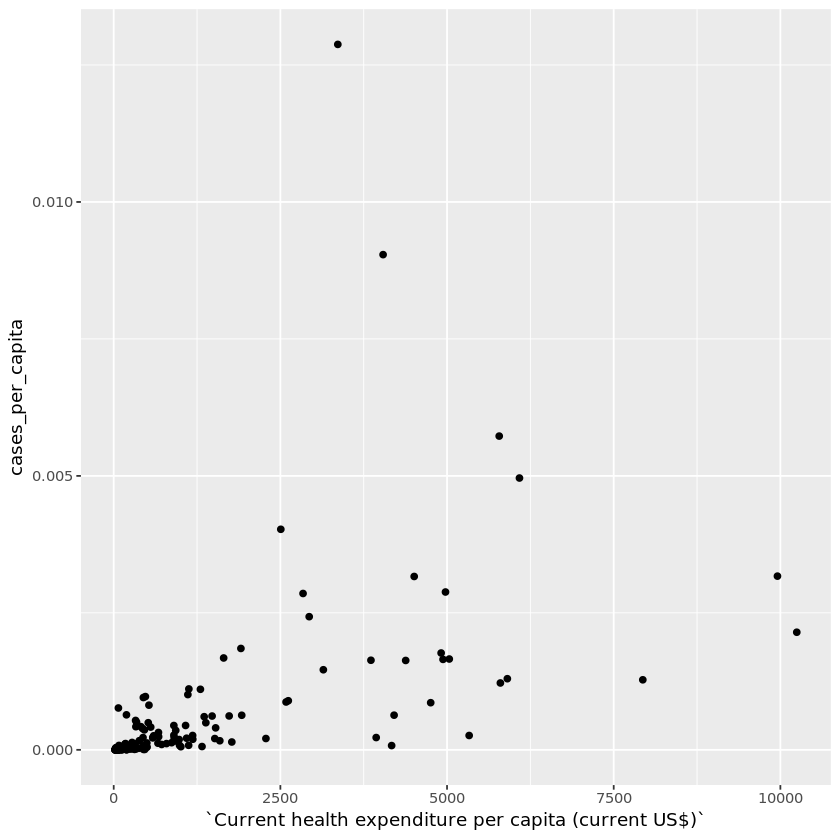

In [16]:
ggplot(result, aes(x=`Current health expenditure per capita (current US$)`, y=cases_per_capita)) + geom_point()

In [27]:
first <- data %>% filter(cases > 0) %>% select(countryterritoryCode, dateRep) %>% group_by(countryterritoryCode) %>% arrange(dateRep) %>%
        slice(1L) %>% ungroup()

